In [23]:
from PIL import Image
Image.MAX_IMAGE_PIXELS = None
from glob import glob
import numpy as np
import pandas as pd
import cv2
import os
from matplotlib import pyplot as plt
from skimage.morphology import remove_small_objects, remove_small_holes
import seaborn as sns
import re

In [24]:
mask_files_path =  [_ for _ in os.listdir(r'\\fatherserverdw\Kevin\imageregistration2\padded_masks') if _.endswith(".png")]
mask_files_path_complete = [os.path.join(r'\\fatherserverdw\Kevin\imageregistration2\padded_masks', x) for x in mask_files_path]
mask_files_path_1 = [x.replace('.png','') for x in mask_files_path]

In [28]:
mask_img = Image.open(mask_files_path_complete[0])
mask_ra = np.array(mask_img)
ta = np.array(mask_ra)
ta2 = (0<ta) &  (ta<12)
ta3 = remove_small_objects(ta2,1000000)
ta4 = remove_small_holes(ta3,100000)
composition = ta[ta4]
hist = np.bincount(composition,)
hist = hist/np.sum(hist)*100
count_list = list(hist)
del(count_list[0])
count_list = [np.round(x,3) for x in count_list]
class_list = list(['corneum','spinosum','hairshaft','hairfollicle','smoothmuscle','oil','sweat','nerve','bloodvessel','ecm','fat','white'])
ratio_class_dict = dict(zip(class_list,count_list))
ratio_df = pd.DataFrame.from_dict(ratio_class_dict,orient='index')
ratio_df

,0
corneum,1.798
spinosum,2.752
hairshaft,0.721
hairfollicle,0.630
smoothmuscle,1.073
oil,2.299
sweat,0.911
nerve,0.495
bloodvessel,3.054
ecm,65.367


In [30]:
# class_list = list(['corneum','spinosum','hairshaft','hairfollicle','smoothmuscle','oil','sweat','nerve','bloodvessel','ecm','fat','white'])
for idx in range(1,len(mask_files_path_complete)):
    mask_img = Image.open(mask_files_path_complete[idx])
    mask_ra = np.array(mask_img)
    ta = np.array(mask_ra)
    ta2 = (0<ta) &  (ta<12)
    ta3 = remove_small_objects(ta2,1000000)
    ta4 = remove_small_holes(ta3,100000)
    composition = ta[ta4]
    hist = np.bincount(composition,)
    hist = hist/np.sum(hist)*100
    count_list = list(hist)
    del(count_list[0])
    count_list = [np.round(x,3) for x in count_list]
    ratio_class_dict = dict(zip(class_list,count_list))
    tmp_df = pd.DataFrame.from_dict(ratio_class_dict,orient='index')
    ratio_df = pd.concat([ratio_df,pd.DataFrame.from_dict(tmp_df)],axis=1)

ratio_df.columns = mask_files_path_1
col_names = ratio_df.columns
new_col_names = [re.findall(r'\d+',x)[1] for x in col_names]
ratio_df.columns = new_col_names
ratio_df

,1,4,7,10,13,16,19,22,25,28,...,73,76,79,82,85,88,91,94,97,100
corneum,1.798,1.339,1.273,1.348,1.462,1.368,1.374,1.262,1.306,1.349,...,1.410,1.575,1.273,1.320,1.406,1.430,1.318,1.410,1.552,1.555
spinosum,2.752,1.973,1.797,1.718,1.811,1.847,1.744,1.702,1.649,1.726,...,1.569,1.475,1.587,1.893,1.649,1.808,1.696,2.109,2.575,2.756
hairshaft,0.721,0.278,0.252,0.375,0.174,0.156,0.190,0.189,0.163,0.187,...,0.186,0.101,0.197,0.270,0.205,0.167,0.190,0.486,0.363,0.340
hairfollicle,0.630,0.225,0.231,0.269,0.193,0.195,0.236,0.197,0.142,0.164,...,0.202,0.105,0.221,0.261,0.189,0.241,0.240,0.429,0.460,0.468
smoothmuscle,1.073,0.236,0.340,0.444,0.364,0.300,0.252,0.329,0.260,0.333,...,0.620,0.381,0.371,0.462,0.504,0.609,0.757,1.286,2.898,1.804
oil,2.299,0.671,0.741,0.546,0.651,0.266,0.591,0.597,0.645,0.698,...,0.432,0.588,1.015,0.521,1.753,2.217,2.340,2.508,2.533,2.301
sweat,0.911,0.561,0.586,0.625,0.559,0.515,0.593,0.606,0.532,0.597,...,0.687,0.484,0.628,0.544,0.644,0.828,0.816,0.942,1.182,1.035
nerve,0.495,0.331,0.327,0.309,0.346,0.324,0.338,0.277,0.265,0.263,...,0.301,0.258,0.326,0.291,0.334,0.355,0.307,0.361,0.530,0.473
bloodvessel,3.054,2.265,2.658,3.216,2.728,2.394,2.759,2.546,2.540,2.665,...,3.419,2.347,3.023,2.857,2.884,3.361,2.857,3.551,3.725,3.178
ecm,65.367,55.928,55.828,54.573,57.832,59.642,58.802,57.464,56.655,57.635,...,62.322,58.420,64.773,63.196,63.454,66.784,65.766,68.933,64.358,65.777


<AxesSubplot:>

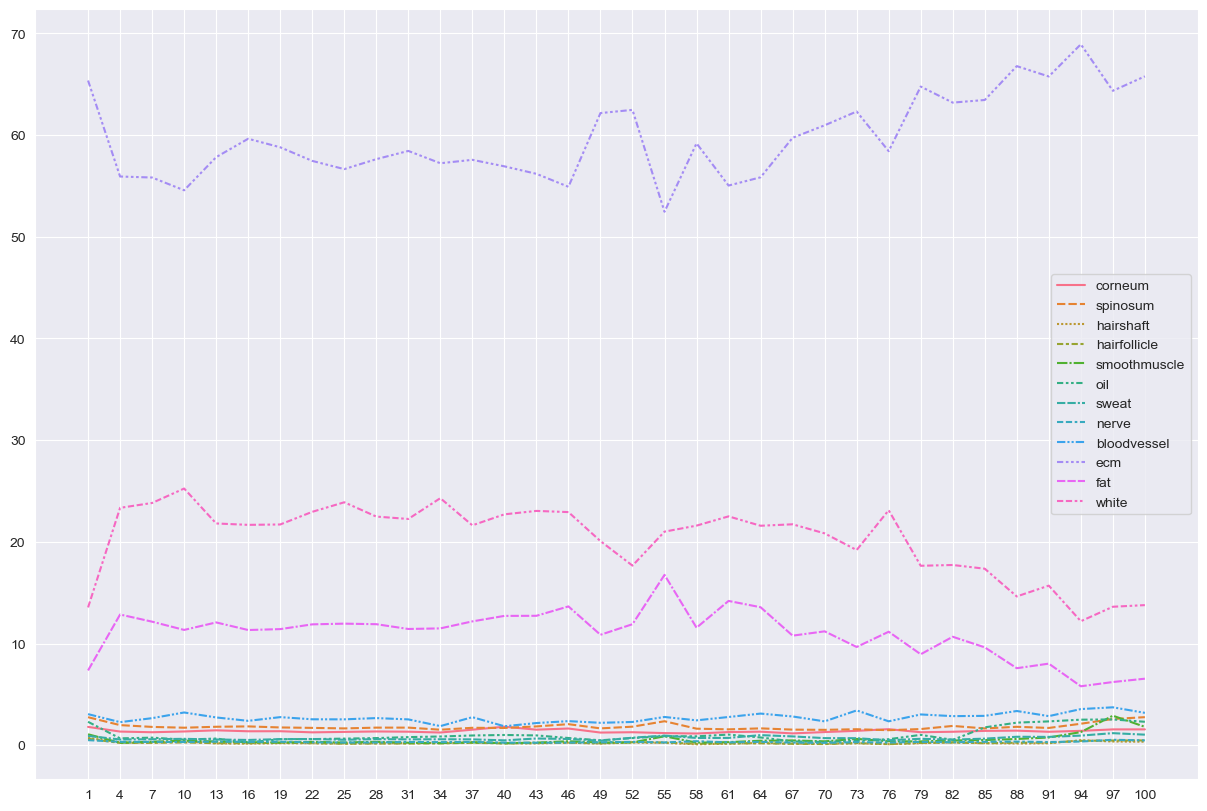

In [37]:
ratio_df_T = ratio_df.T
plt.figure(figsize=(15,10))
sns.lineplot(data = ratio_df_T)

In [36]:
print(ratio_df_T)

     corneum  spinosum  hairshaft  hairfollicle  smoothmuscle    oil  sweat  \
1      1.798     2.752      0.721         0.630         1.073  2.299  0.911   
4      1.339     1.973      0.278         0.225         0.236  0.671  0.561   
7      1.273     1.797      0.252         0.231         0.340  0.741  0.586   
10     1.348     1.718      0.375         0.269         0.444  0.546  0.625   
13     1.462     1.811      0.174         0.193         0.364  0.651  0.559   
16     1.368     1.847      0.156         0.195         0.300  0.266  0.515   
19     1.374     1.744      0.190         0.236         0.252  0.591  0.593   
22     1.262     1.702      0.189         0.197         0.329  0.597  0.606   
25     1.306     1.649      0.163         0.142         0.260  0.645  0.532   
28     1.349     1.726      0.187         0.164         0.333  0.698  0.597   
31     1.326     1.728      0.191         0.165         0.240  0.794  0.574   
34     1.246     1.521      0.232         0.176     